# Oxydation électrochimique sur une électrode tournante

Considérons une électrode tournante dont la vitesse de rotation est 250 trs.min-1. La réaction d'oxydation sur l'électrode peut être considérée en première approximation à une réaction hétérogène d'ordre 1 avec une constante de vitesse de 2.10-4 m.s-1. Cette électrode est plongée dans une solution de glucose à 0,1 g/l ($\rho$=1000 kg/m3, $\mu$=0,001 Pa.s,D=7.10-10 m2.s-1).

*L'exercice proposé est simplifié (comme beaucoup d'exercice). En réalité pour oxyder du glucose sur une électrode (et en faire donc un capteur à glucose), il faut créer un film de polymère à la surface de l'électrode qui immobilise des enzymes qui oxydent le glucose. Ce problème pourrait se traiter en examinant en série la diffusion du glucose et la réaction avec l'enzyme dans le film puis la réaction électrochimique à l'interface. 

**Calculer la concentration en glucose à la surface de l'électrode.**

>Le problème correspond à un transfert par diffusion dans une couche limite couplé à une réaction hétérogène (à l'électrode). En effectuant un bilan différentiel dans un élément de volume dans la couche limite (coord. rect.) en régime permanent, il est possible (voir cours) de déterminer le profil de concentration et ainsi la concentration en réactif à l'interface qui conditionne le flux de matière à l'interface. Pour un tel couplage, il a été démontré pour une réaction d'ordre 1que le nombre de Damkholer permet de caractériser l'influence relative de la réaction et de la diffusion :
$$Da=\frac{k_R \delta }{D}$$
>où $k_R$ est la constante de vitesse de réaction, D le coefficient de diffusion du soluté et $\delta$ l'épaisseur de la couche limite de diffusion (qui dépend de l'agitation au dessus de l'interface). Calculons l'épaisseur de couche limite sur l'électrode. La vitesse de rotation correspond à une vitesse angulaire de 26,2 rad.s-1. Nous pouvons utiliser soit la correlation entre nombres sans dimensions pour le transfert de matière autour d'un disque tournant :
$$Sh=0.62Re^{1/2}Sc^{1/3}$$ avec $$Re=\frac{\rho w d^2}{\mu}$$
ou l'équation de Levich :
$$\delta=1.61D^{1/3}\omega^{-1/2}(\frac{\mu}{\rho})^{1/6}$$
>Le nombre de Damköhler est alors de 8 ce qui correspond à un régime limité par la concentration. La concentration à l'électrode donnée par l'expression $c_i=c_0\frac{1}{1+Da}$ est de 0.011 g/L. L'efficacité qui représente le rapport $\frac{qqté~de~matière~qui~réagit}{qqté~de~matière~qui~réagirait~si~la~diffusion~était~infinie}$ qui s'écrit $\eta=\frac{1}{1+Da}$, est de 11 %. Le flux de glucose oxydé à l'électrode est de 2.22 mg/(m2.s)
>
>Le code ci-dessous détaille ces calculs avec la séquence suivante :
>1. calcul de l'épaisseur de couche limite, $\delta$
>2. calcul du nombre de Damkholer
>3. calcul de l'efficacité
>4. calcul de la concentration à l'interface
>5. calcul du flux de glucose oxydé à l'électrode

Sh= 3.56e+02
delta= 2.81e-05 m
delta par Levich 2.79e-05
Da= 8.016
Efficiency= 0.111
Concentration à l interface 1.11e-02


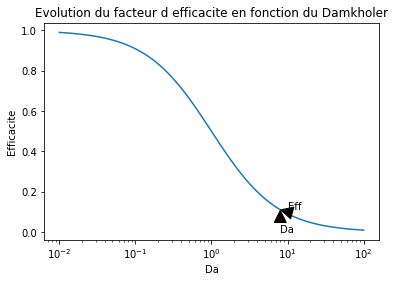

Flux de glucose s oxydant à l interface 2.22e-06 en kg/(m2.s)
Le(s) phénomène(s) de diffusion est(sont) limitant(s) pour le fonctionnement du procédé


In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton
#DATA
#constant for the electrochemical reaction
kr=2.e-4
o_r=1.
ceq=0.
#hydro
w=250. #trs/min
wSI=w*2*np.pi/60 #rad/s
#solution
c0=0.1 #g/L ou kg/m3
ro=1000. #kg/m3
D=7.e-10 #m2/s
mu=0.001 #Pa.s
#Electrode (on pose en l'absence de données mais on verra que la donnée est inutile)
d=0.01 #m

#COEFFICIENT DE MATIERE PAR CORRELATION ADIMENSIONNELLE
#Reynolds
Re=ro*wSI*d*d/mu
#Schmidt
Sc=mu/(ro*D)
#Sherwood
Sh=0.62*Re**0.5*Sc**0.333
print ('Sh=',"%.2e"%Sh)
k=Sh*D/d
delta=D/k
print ('delta=',"%.2e"%delta, 'm')

#VERIFICATION PAR Eq. DE LEVICH
delta_levich=1.61*D**(1./3.)*wSI**(-1./2.)*(mu/ro)**(1./6.)
print ('delta par Levich', "%.2e"%delta_levich)

#DAMKHOLER
Da=kr/k
print ('Da=', round(Da,3))

#Définition de la fonction permettant le calcul de l'efficacité suivant l'ordre de réaction
if o_r==1 :
    def ef(Da):
        eff=1/(1+Da)
        return eff
if o_r==2 :
    def ef(Da):
        eff=1/Da + 1/(2*Da**2)-np.sqrt(1+4*Da)/(2*Da**2)
        return eff
if o_r>2 :
    def ef(Da):
        def f(eff):
            return eff-(1-eff*Da)**o_r
        eff=newton(f,x0=0.5)
        return eff  
#Cacul de la concentration à l'interface
ci=ceq+(ef(Da)*(c0-ceq)**o_r)**(1/o_r)

print ('Efficiency=',round(ef(Da),3)) 
print ('Concentration à l interface', "%.2e"%ci)
x=np.logspace(-2,2,100)
plt.semilogx(x,ef(x))
plt.annotate('Eff', xy=(Da, ef(Da)), xytext=(10,ef(Da)),arrowprops=dict(facecolor='black', shrink=0.05),)
plt.annotate('Da', xy=(Da, ef(Da)), xytext=(Da, 0),arrowprops=dict(facecolor='black', shrink=0.05),)
plt.title('Evolution du facteur d efficacite en fonction du Damkholer')
plt.xlabel('Da')
plt.ylabel('Efficacite')
plt.show()

#taux de croissance
N=ef(Da)*kr*(c0-ceq)**o_r
print ('Flux de glucose s oxydant à l interface', "%.2e"%N, 'en kg/(m2.s)')

if Da<0.3:
    lim='réation'
elif Da>3:
    lim='diffusion'
else :
    lim='diffusion interne et réaction'
print ('Le(s) phénomène(s) de', lim, 'est(sont) limitant(s) pour le fonctionnement du procédé')


**Déduire le phénomène limitant pour cette oxydation. Proposer alors une amélioration de l’efficacité du procédé.**

>Nous sommes dans ce problème dans un régime où la diffusion du réactif (glucose) de la solution vers l'électrode est l'étape limitante du procédé Da>>1. Une solution pour améliorer le rendement du procédé consiste alors à augmenter la diffusion du réactif afin d'augmenter sa concentration à la surface de l'électrode. Il est ainsi possible de réduire l'épaisseur de la couche limite de diffusion en augmentant par exemple la vitesse de rotation de l'électrode. Ainsi si la vitesse de rotation de l'électrode tournante est augmentée à 2000 trs/min, l'épaisseur de couche limite est réduite à 9,86 $\mu m$. Le nombre de Da est alors de 2,9. La concentration à l'électrode est de 0,026 g.l-1. On oxyde ainsi 2,4 fois plus de glucose que dans le cas précédent. Le capteur à glucose peut ainsi gagner en sensibilité (mais attention il sera nécessaire d'amener plus d'énergie pour faire tourner l'électrode plus rapidement).
>
>Le code ci-dessous permet de calculer les différents paramètres pour trois vitesses de rotation différentes.


In [88]:
#Comparison pour trois vitesses de rotation différentes
w=[250,1000 ,2000]

#Création de tableau pour stocker les valeurs correspondant aux 3 cas
Re=np.zeros(3)
Sh=np.zeros(3)
k=np.zeros(3)
Da=np.zeros(3)
eff=np.zeros(3)
ci=np.zeros(3)
delta=np.zeros(3)
N=np.zeros(3)

#Calcul du transfert de matière, du damkholer, de l'efficacité, du flux de matière et de l'efficacité pour les trois cas
for i in range(len(u)):
    Re[i]=ro*(w[i]*2*np.pi/60.)*d*d/mu
    Sh[i]=0.62*Re[i]**0.5*Sc**0.33
    k[i]=Sh[i]*D/d
    delta[i]=D/k[i]
    Da[i]=kr/k[i]    
    eff[i]=1/(1+Da[i]) 
    ci[i]=eff[i]*c0
    N[i]=kr*ci[i]
    
print ('                              A               B                  C      ')
print ('                --------------------------------------------------------------')
print ('w(trs/min)      |          ', round(w[0],3), '             ', round(w[1],3),'            ', round(w[2],3))
print ('Re              |          ', round(Re[0]), '          ', round(Re[1]),'         ', round(Re[2]))
print ('Sh              |          ', round(Sh[0],1), '           ', round(Sh[1],1),'           ', round(Sh[2],1))
print ('delta(microm)   |          ', round(delta[0]*1e6,1), '            ', round(delta[1]*1e6,1),'            ', round(delta[2]*1e6,1))
print ('Da              |          ', round(Da[0],3), '           ', round(Da[1],3),'           ', round(Da[2],3))
print ('ci(kg/m3)       |          ', round(ci[0],4), '          ', round(ci[1],4),'          ', round(ci[2],4))
print ('Efficacite      |          ', round(eff[0],3), '           ', round(eff[1],3),'           ', round(eff[2],3))
print ('N(mol.m-2.s-1)  |          ', "%.2e"%N[0], '        ', "%.2e"%N[1],'        ', "%.2e"%N[2])

                              A               B                  C      
                --------------------------------------------------------------
w(trs/min)      |           250               1000              2000
Re              |           2618.0            10472.0           20944.0
Sh              |           348.7             697.5             986.4
delta(microm)   |           28.7              14.3              10.1
Da              |           8.193             4.096             2.897
ci(kg/m3)       |           0.0109            0.0196            0.0257
Efficacite      |           0.109             0.196             0.257
N(mol.m-2.s-1)  |           2.18e-06          3.92e-06          5.13e-06
